In [143]:
import librosa
import soundfile
import os, glob, pickle
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
import pandas as pd
import seaborn as sns

In [144]:
#- Extract features (mfcc, chroma, mel) from a sound file
def extract_feature(file_name, mfcc, chroma, mel):
    with soundfile.SoundFile(file_name) as sound_file:
        X = sound_file.read(dtype="float32")
        sample_rate=sound_file.samplerate
        if chroma:
            stft=np.abs(librosa.stft(X))
        result=np.array([])
        if mfcc:
            mfccs=np.mean(librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=40).T, axis=0)
            result=np.hstack((result, mfccs))
        if chroma:
            chroma=np.mean(librosa.feature.chroma_stft(S=stft, sr=sample_rate).T,axis=0)
            result=np.hstack((result, chroma))
        if mel:
            mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
            result=np.hstack((result, mel))
    return result

### Dataset Description:
- RAVDESS. This dataset includes around 1500 audio file input from 24 different actors. 12 male and 12 female where these actors record short audios in 8 different emotions i.e 1 = neutral, 2 = calm, 3 = happy, 4 = sad, 5 = angry, 6 = fearful, 7 = disgust, 8 = surprised.
- Each audio file is named in such a way that the 7th character is consistent with the different emotions that they represent.

In [145]:
#- Emotions in the RAVDESS dataset
emotions={
  '01':'neutral',
  '02':'calm',
  '03':'happy',
  '04':'sad',
  '05':'angry',
  '06':'fearful',
  '07':'disgust',
  '08':'surprised'
}

#- Emotions to observe
observed_emotions=['happy', 'sad', 'angry']

In [146]:
# Load the data and extract features for each sound file
def load_data(test_size=0.2):
    x,y=[],[]
    for file in glob.glob('speech-emotion-recognition-ravdess-data//Actor_*//*.wav'):
    #for file in glob.glob("D:\\DataFlair\\ravdess data\\Actor_*\\*.wav"):
        file_name=os.path.basename(file)
        emotion=emotions[file_name.split("-")[2]]
        if emotion not in observed_emotions:
            continue
        feature=extract_feature(file, mfcc=True, chroma=True, mel=True)
        x.append(feature)
        y.append(emotion)
    print(len(x))
    return train_test_split(np.array(x), y, test_size=test_size, random_state=9)

In [148]:
#- Split the dataset
x_train,x_test,y_train,y_test=load_data(test_size=0.25)

576


In [149]:
pd.DataFrame(x_train)

,0,1,2,3,4,5,6,7,8,9,...,170,171,172,173,174,175,176,177,178,179
0,-635.539917,48.913681,-1.334187,9.256164,3.473320,-1.483662,-13.065701,-6.263948,-6.942184,4.532269,...,0.000082,0.000118,0.000074,0.000058,0.000070,0.000049,0.000052,0.000041,0.000013,0.000007
1,-595.491638,63.307995,-9.190067,18.133595,0.293340,-6.478998,-16.387072,-2.432556,0.271551,-6.522094,...,0.000163,0.000073,0.000040,0.000021,0.000048,0.000052,0.000071,0.000068,0.000032,0.000018
2,-415.265991,17.019833,-32.023663,-4.579306,-25.849531,-2.643941,-18.495287,-11.433888,-8.231014,-7.907068,...,0.002161,0.001783,0.001656,0.001306,0.001037,0.001042,0.001067,0.000989,0.000779,0.000451
3,-654.364929,55.947403,10.032094,14.811560,6.176264,4.364373,-4.320948,-2.160571,-4.422164,4.349211,...,0.000013,0.000017,0.000013,0.000009,0.000011,0.000019,0.000017,0.000005,0.000004,0.000002
4,-536.411194,37.881516,-24.262259,1.175580,-16.508852,-6.072886,-12.085666,-19.143553,-2.990855,-3.580963,...,0.000258,0.000175,0.000279,0.000210,0.000106,0.000106,0.000141,0.000073,0.000030,0.000025
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
427,-405.639954,14.440585,-31.124907,-3.091275,-26.212135,-0.806042,-17.687391,-9.568361,-8.240066,-7.482601,...,0.001595,0.001436,0.001333,0.001338,0.001124,0.000888,0.000667,0.000467,0.000394,0.000289
428,-590.579651,57.333092,-2.623664,17.550770,-2.282796,-14.932240,-7.920538,-10.666642,-6.124822,-5.736745,...,0.000068,0.000039,0.000047,0.000016,0.000014,0.000012,0.000007,0.000006,0.000006,0.000008
429,-361.114990,43.840473,-23.039068,9.333183,-7.226469,-9.275711,-8.001760,-7.286619,-3.924150,1.859063,...,0.003026,0.003096,0.004946,0.005072,0.006301,0.003938,0.003053,0.002635,0.001193,0.000623
430,-424.839478,40.239738,-16.835926,19.658031,-7.649911,-9.551789,-4.030232,-20.047182,-5.693709,0.380741,...,0.002696,0.002852,0.003253,0.001435,0.002909,0.002293,0.000912,0.000799,0.000458,0.000240


In [150]:
y_test=pd.DataFrame(y_test)

In [151]:
y_test[0].value_counts()

happy    53
sad      46
angry    45
Name: 0, dtype: int64

In [152]:
y_test = list(y_test.values)

In [153]:
#Get the shape of the training and testing datasets
print((x_train.shape[0], x_test.shape[0]))

(432, 144)


In [154]:
model=MLPClassifier(alpha=0.01, batch_size=256, epsilon=1e-08, hidden_layer_sizes=(300,), learning_rate='adaptive', max_iter=500)

In [155]:
model.fit(x_train,y_train)

MLPClassifier(alpha=0.01, batch_size=256, hidden_layer_sizes=(300,),
              learning_rate='adaptive', max_iter=500)

In [156]:
y_pred=model.predict(x_test)


In [157]:
accuracy=accuracy_score(y_true=y_test, y_pred=y_pred)

In [158]:
print("Accuracy: {:.2f}%".format(accuracy*100))

Accuracy: 76.39%


In [159]:
from sklearn.metrics import confusion_matrix

In [160]:
cm = confusion_matrix(y_true=y_test,y_pred=y_pred)

In [162]:
cm

array([[36,  6,  3],
       [ 5, 39,  9],
       [ 1, 10, 35]])

In [163]:
y_test=pd.DataFrame(y_test)

In [164]:
y_test[0].value_counts()

happy    53
sad      46
angry    45
Name: 0, dtype: int64

<AxesSubplot:>

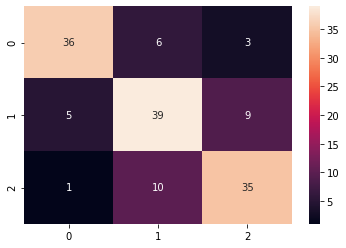

In [165]:
sns.heatmap(cm,annot=True)

In [166]:
model.score(x_test,y_test)

0.7638888888888888

In [167]:
import warnings
warnings.filterwarnings('ignore')

In [168]:
from keras import models
from keras import layers
from keras.utils import to_categorical

In [169]:
network = models.Sequential()
network.add(layers.Dense(180, activation='relu', input_shape=(180,)))
network.add(layers.Dense(10, activation='relu', input_shape=(180,)))
network.add(layers.Dense(10, activation='relu', input_shape=(10,)))
network.add(layers.Dense(10, activation='relu', input_shape=(10,)))
network.add(layers.Dense(10, activation='relu', input_shape=(10,)))
network.add(layers.Dense(10, activation='relu', input_shape=(10,)))
network.add(layers.Dense(3, activation='softmax'))
network.compile(optimizer='adam',
                loss='categorical_crossentropy',
                metrics=['accuracy'])

In [170]:
from sklearn.preprocessing import LabelEncoder

In [171]:
network.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7 (Dense)              (None, 180)               32580     
_________________________________________________________________
dense_8 (Dense)              (None, 10)                1810      
_________________________________________________________________
dense_9 (Dense)              (None, 10)                110       
_________________________________________________________________
dense_10 (Dense)             (None, 10)                110       
_________________________________________________________________
dense_11 (Dense)             (None, 10)                110       
_________________________________________________________________
dense_12 (Dense)             (None, 10)                110       
_________________________________________________________________
dense_13 (Dense)             (None, 3)                

In [172]:
y_train = LabelEncoder().fit_transform(y_train)

In [173]:
y_train = to_categorical(y_train)

In [174]:
y_test = LabelEncoder().fit_transform(y_test)

In [175]:
y_test = to_categorical(y_test)

In [176]:
network.fit(x_train, y_train, epochs=100, batch_size=32)


Epoch 1/100
14/14 [==============================] - 0s 8ms/step - loss: 1.1826 - accuracy: 0.3403
Epoch 2/100
14/14 [==============================] - 0s 5ms/step - loss: 1.0589 - accuracy: 0.3866
Epoch 3/100
14/14 [==============================] - 0s 3ms/step - loss: 0.9736 - accuracy: 0.5185
Epoch 4/100
14/14 [==============================] - 0s 9ms/step - loss: 0.9218 - accuracy: 0.5255
Epoch 5/100
14/14 [==============================] - 0s 5ms/step - loss: 0.9072 - accuracy: 0.5069
Epoch 6/100
14/14 [==============================] - 0s 6ms/step - loss: 0.9335 - accuracy: 0.5301
Epoch 7/100
14/14 [==============================] - 0s 5ms/step - loss: 0.9239 - accuracy: 0.5417
Epoch 8/100
14/14 [==============================] - 0s 7ms/step - loss: 0.9744 - accuracy: 0.4144
Epoch 9/100
14/14 [==============================] - 0s 7ms/step - loss: 0.9577 - accuracy: 0.4421
Epoch 10/100
14/14 [==============================] - 0s 5ms/step - loss: 0.9333 - accuracy: 0.4468
Epoch 11/

Epoch 83/100
14/14 [==============================] - 0s 3ms/step - loss: 0.5831 - accuracy: 0.7546
Epoch 84/100
14/14 [==============================] - 0s 5ms/step - loss: 0.5276 - accuracy: 0.7731
Epoch 85/100
14/14 [==============================] - 0s 4ms/step - loss: 0.5054 - accuracy: 0.7801
Epoch 86/100
14/14 [==============================] - 0s 3ms/step - loss: 0.5360 - accuracy: 0.7662
Epoch 87/100
14/14 [==============================] - 0s 4ms/step - loss: 0.4861 - accuracy: 0.8056
Epoch 88/100
14/14 [==============================] - 0s 4ms/step - loss: 0.4695 - accuracy: 0.8102
Epoch 89/100
14/14 [==============================] - 0s 3ms/step - loss: 0.4687 - accuracy: 0.7963
Epoch 90/100
14/14 [==============================] - 0s 3ms/step - loss: 0.4698 - accuracy: 0.8032
Epoch 91/100
14/14 [==============================] - 0s 2ms/step - loss: 0.4914 - accuracy: 0.7917
Epoch 92/100
14/14 [==============================] - 0s 5ms/step - loss: 0.4608 - accuracy: 0.8171


In [177]:
test_loss, test_acc = network.evaluate(x_test, y_test)
print('test_acc:', test_acc, 'test_loss', test_loss)

5/5 [==============================] - 0s 5ms/step - loss: 0.6562 - accuracy: 0.7569
test_acc: 0.7569444179534912 test_loss 0.6562196612358093


In [178]:
test = x_test[0].T

In [179]:
test.shape

(180,)


  '03':'happy',
  '04':'sad',
  '05':'angry',
  


In [182]:
happy =[]
angry = []
sad = []
for file in glob.glob('speech-emotion-recognition-ravdess-data//Actor_*//*.wav'):
    #for file in glob.glob("D:\\DataFlair\\ravdess data\\Actor_*\\*.wav"):
        file_name=os.path.basename(file)
        emotion=emotions[file_name.split("-")[2]]
        if emotion not in observed_emotions:
            continue
        if emotion =='happy':
            happy.append(file)
        elif emotion=='angry':
            angry.append(file)
        elif emotion=='sad':
            sad.append(file)
            
print("There are "+str(len(happy))+" files with happy emotion")
print("There are "+str(len(angry))+" files with angry emotion")
print("There are "+str(len(sad))+" files with sad emotion")
        

There are 192 files with happy emotion
There are 192 files with angry emotion
There are 192 files with sad emotion


### Get the predictions using model 

### select any file having happy emotion from list happy

In [183]:
file = happy[100]   ## selecting 100th file from happylist

In [184]:
feat=extract_feature(file, mfcc=True, chroma=True, mel=True)
temp = feat.reshape(1, 180)
pred = np.argmax(network.predict(temp))
emotions = {0:'angry',1:'happy',2:'sad'}
print("Predicted Emotion "+emotions[(pred)])

Predicted Emotion happy


### select any file having sad emotion from list sad

In [185]:
file = sad[50]   ## selecting 50th file from happylist

In [186]:
feat=extract_feature(file, mfcc=True, chroma=True, mel=True)
temp = feat.reshape(1, 180)
pred = np.argmax(network.predict(temp))
emotions = {0:'angry',1:'happy',2:'sad'}
print("Predicted Emotion "+emotions[(pred)])

Predicted Emotion sad


### select any file having angry emotion from list angry

In [187]:
file = sad[75]   ## selecting 75th file from happylist

In [188]:
feat=extract_feature(file, mfcc=True, chroma=True, mel=True)
temp = feat.reshape(1, 180)
pred = np.argmax(network.predict(temp))
emotions = {0:'angry',1:'happy',2:'sad'}
print("Predicted Emotion "+emotions[(pred)])

Predicted Emotion sad


we can see that our model is able to identify the emotions in the audio files